# Introduction

To understand customer behavior, potentially predict future actions and derive insights to improve business strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder



import warnings
warnings.filterwarnings('ignore')

# Loading Datasets

In [2]:
data = pd.read_csv('SAADAA_assessment_data.csv')

In [3]:
data

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
0,CUST00001,39,Delhi,Returning,ORD000001,08/12/2023,4015.21,Net Banking,9,5,No,Jackets,SKU0001,XXL,In Stock,Word of Mouth,36
1,CUST00002,52,Hyderabad,Returning,ORD000002,06/09/2023,2205.61,Credit Card,3,15,No,T-Shirts,SKU0002,S,Out of Stock,Google Ads,37
2,CUST00003,29,Pune,Returning,ORD000003,01/05/2023,858.84,Net Banking,8,30,No,T-Shirts,SKU0003,L,In Stock,Email Marketing,95
3,CUST00004,15,Jaipur,Returning,ORD000004,02/03/2023,500.00,UPI,1,0,No,T-Shirts,SKU0004,XXL,In Stock,Word of Mouth,10
4,CUST00005,43,Pune,Returning,ORD000005,11/04/2023,1843.50,Wallet,9,40,Yes,Sweatshirts,SKU0005,L,In Stock,Word of Mouth,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CUST00996,4,Mumbai,New,ORD000996,06/01/2023,4043.83,Wallet,5,15,Yes,Shirts,SKU0996,XXL,In Stock,Google Ads,38
996,CUST00997,1,Chennai,New,ORD000997,30/07/2023,3531.79,Credit Card,2,0,No,T-Shirts,SKU0997,S,In Stock,Facebook Ads,44
997,CUST00998,49,Delhi,Returning,ORD000998,08/01/2023,3129.50,Net Banking,4,20,Yes,Jackets,SKU0998,XL,In Stock,Instagram,77
998,CUST00999,40,Mumbai,Returning,ORD000999,20/08/2023,1934.51,Net Banking,2,20,No,Shirts,SKU0999,XXL,In Stock,Word of Mouth,80


In [4]:
data.head()

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
0,CUST00001,39,Delhi,Returning,ORD000001,08/12/2023,4015.21,Net Banking,9,5,No,Jackets,SKU0001,XXL,In Stock,Word of Mouth,36
1,CUST00002,52,Hyderabad,Returning,ORD000002,06/09/2023,2205.61,Credit Card,3,15,No,T-Shirts,SKU0002,S,Out of Stock,Google Ads,37
2,CUST00003,29,Pune,Returning,ORD000003,01/05/2023,858.84,Net Banking,8,30,No,T-Shirts,SKU0003,L,In Stock,Email Marketing,95
3,CUST00004,15,Jaipur,Returning,ORD000004,02/03/2023,500.00,UPI,1,0,No,T-Shirts,SKU0004,XXL,In Stock,Word of Mouth,10
4,CUST00005,43,Pune,Returning,ORD000005,11/04/2023,1843.50,Wallet,9,40,Yes,Sweatshirts,SKU0005,L,In Stock,Word of Mouth,0


In [5]:
data.tail()

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
995,CUST00996,4,Mumbai,New,ORD000996,06/01/2023,4043.83,Wallet,5,15,Yes,Shirts,SKU0996,XXL,In Stock,Google Ads,38
996,CUST00997,1,Chennai,New,ORD000997,30/07/2023,3531.79,Credit Card,2,0,No,T-Shirts,SKU0997,S,In Stock,Facebook Ads,44
997,CUST00998,49,Delhi,Returning,ORD000998,08/01/2023,3129.50,Net Banking,4,20,Yes,Jackets,SKU0998,XL,In Stock,Instagram,77
998,CUST00999,40,Mumbai,Returning,ORD000999,20/08/2023,1934.51,Net Banking,2,20,No,Shirts,SKU0999,XXL,In Stock,Word of Mouth,80
999,CUST01000,32,Jaipur,Returning,ORD001000,29/04/2023,3363.67,Wallet,2,20,No,Jackets,SKU1000,XL,In Stock,Facebook Ads,11


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1000 non-null   object 
 1   customer_tenure    1000 non-null   int64  
 2   customer_location  1000 non-null   object 
 3   customer_type      1000 non-null   object 
 4   order_id           1000 non-null   object 
 5   order_date         1000 non-null   object 
 6   order_value        1000 non-null   float64
 7   payment_method     1000 non-null   object 
 8   order_frequency    1000 non-null   int64  
 9   discount_applied   1000 non-null   int64  
 10  return_status      1000 non-null   object 
 11  product_category   1000 non-null   object 
 12  product_sku        1000 non-null   object 
 13  size               1000 non-null   object 
 14  inventory_status   1000 non-null   object 
 15  source             1000 non-null   object 
 16  engagement_score   1000 n

#  Data Cleaning and Preprocessing

In [7]:
data.isnull().sum()

customer_id          0
customer_tenure      0
customer_location    0
customer_type        0
order_id             0
order_date           0
order_value          0
payment_method       0
order_frequency      0
discount_applied     0
return_status        0
product_category     0
product_sku          0
size                 0
inventory_status     0
source               0
engagement_score     0
dtype: int64

In [8]:
data.describe()

,customer_tenure,order_value,order_frequency,discount_applied,engagement_score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,31.200000,2600.555060,5.032000,14.72000,50.435000
std,17.372905,1394.337968,2.551762,14.22758,28.985582
min,1.000000,500.000000,1.000000,0.00000,0.000000
25%,17.000000,1565.915000,3.000000,0.00000,26.000000
50%,32.000000,2541.280000,5.000000,15.00000,51.000000
75%,47.000000,3541.415000,7.000000,25.00000,76.000000
max,60.000000,7251.060000,9.000000,50.00000,100.000000


In [9]:
data.duplicated().sum()

0

In [10]:
data.shape,data.size

((1000, 17), 17000)

In [11]:
data.nunique()

customer_id          1000
customer_tenure        60
customer_location       8
customer_type           2
order_id             1000
order_date            365
order_value           913
payment_method          5
order_frequency         9
discount_applied        9
return_status           2
product_category        6
product_sku          1000
size                    5
inventory_status        2
source                  5
engagement_score      101
dtype: int64

In [12]:
print (data.columns)

Index(['customer_id', 'customer_tenure', 'customer_location', 'customer_type',
       'order_id', 'order_date', 'order_value', 'payment_method',
       'order_frequency', 'discount_applied', 'return_status',
       'product_category', 'product_sku', 'size', 'inventory_status', 'source',
       'engagement_score'],
      dtype='object')


#  Data Visualization

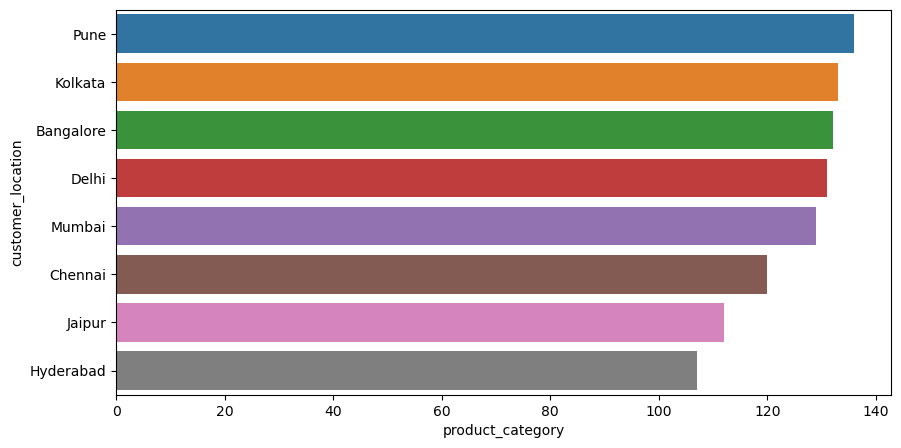

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(y='customer_location',data=data,order=data['customer_location'].value_counts().iloc[0:10].index)
plt.xlabel('product_category')
plt.show()

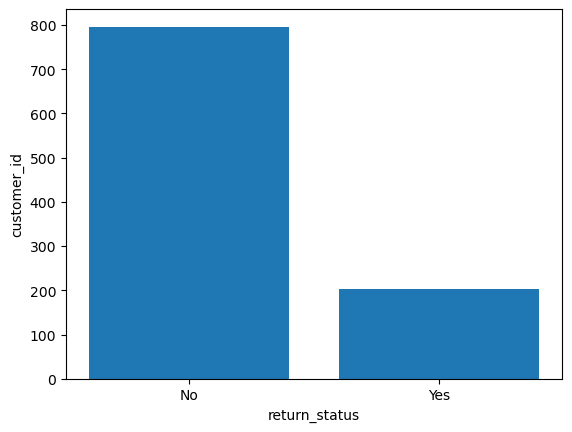

In [14]:
#creating barplot
left_count=data.groupby('return_status').count()
plt.bar(left_count.index.values,left_count['customer_id'])
plt.xlabel('return_status')
plt.ylabel('customer_id')
plt.show()

In [15]:
data.return_status. value_counts()

return_status
No     796
Yes    204
Name: count, dtype: int64

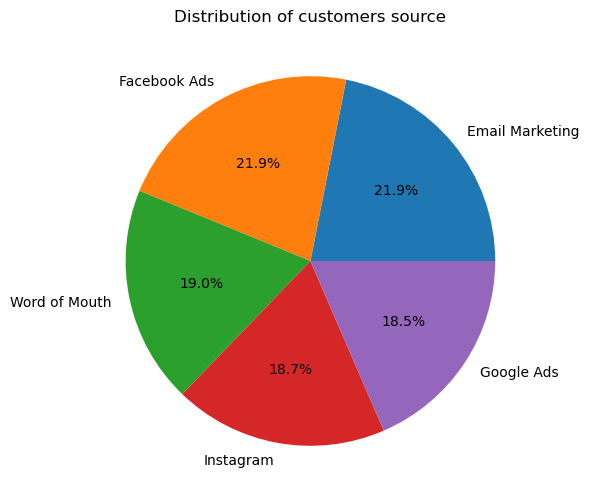

In [16]:
plt.figure(figsize=(12,6))
data['source'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Distribution of customers source')
plt.ylabel('')
plt.show()

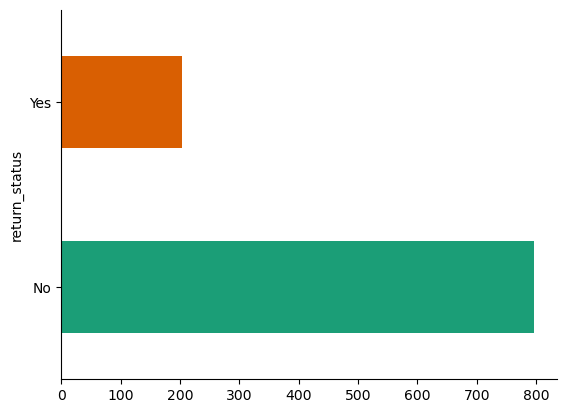

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('return_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


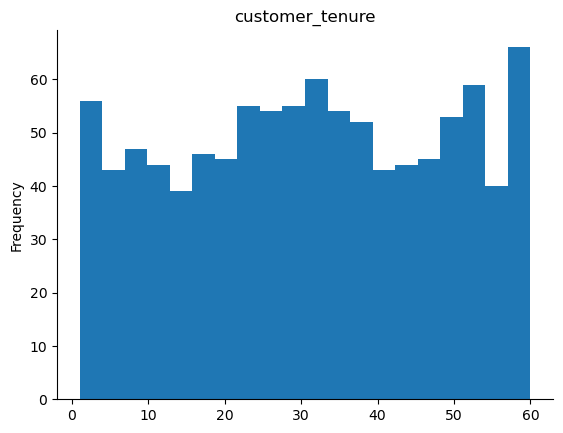

In [18]:
from matplotlib import pyplot as pyplot
data['customer_tenure'].plot(kind='hist',bins=20,title='customer_tenure')
plt.gca().spines[['top','right']].set_visible(False)


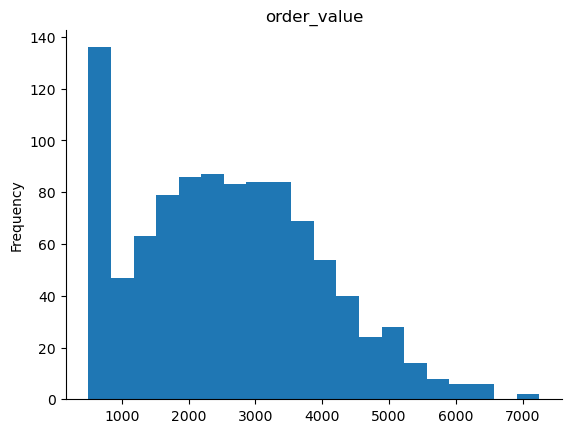

In [19]:
from matplotlib import pyplot as plt
data['order_value'].plot(kind='hist', bins=20, title='order_value')
plt.gca().spines[['top', 'right',]].set_visible(False)


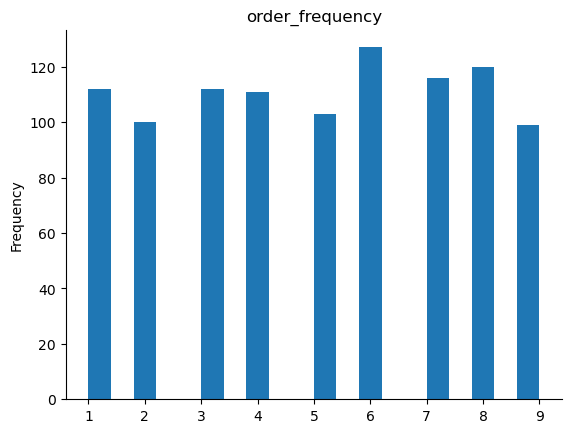

In [20]:
from matplotlib import pyplot as plt
data['order_frequency'].plot(kind='hist', bins=20, title='order_frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

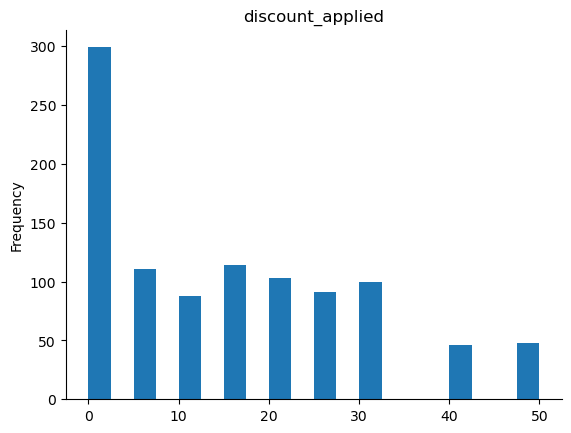

In [21]:
from matplotlib import pyplot as plt
data['discount_applied'].plot(kind='hist', bins=20, title='discount_applied')
plt.gca().spines[['top', 'right',]].set_visible(False)

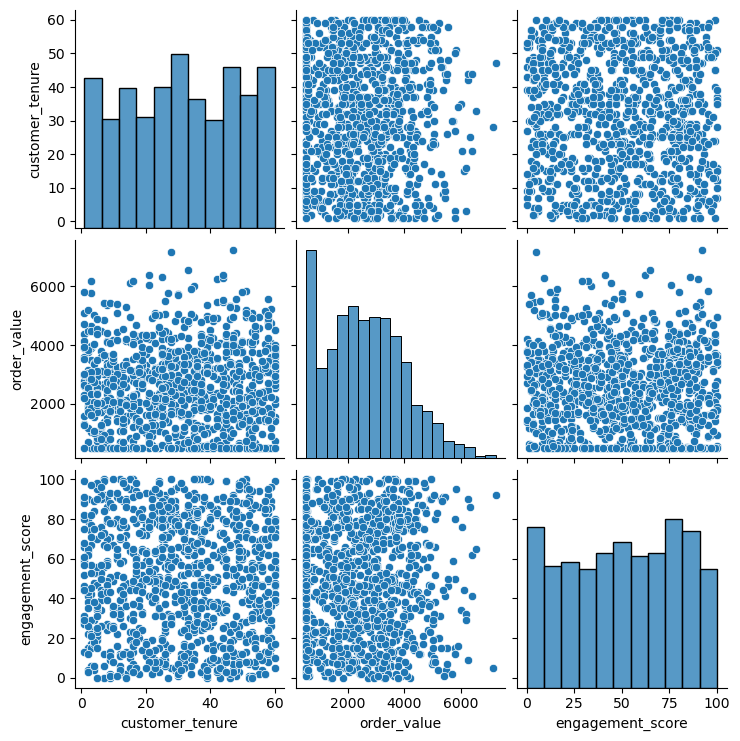

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data[['customer_tenure','order_value','engagement_score']])
plt.show()

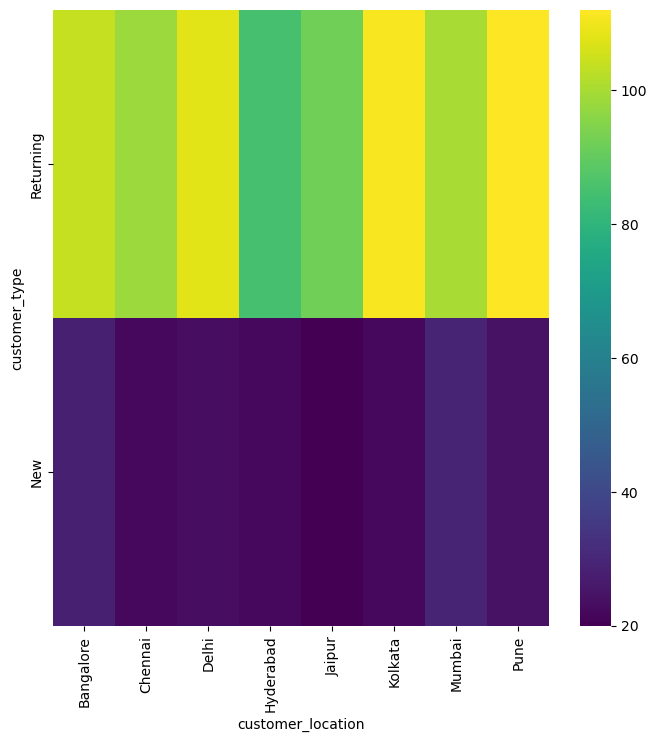

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
data_2dhist = pd.DataFrame({
    x_label: grp['customer_type'].value_counts()
    for x_label, grp in data.groupby('customer_location')
})
sns.heatmap(data_2dhist, cmap='viridis')
plt.xlabel('customer_location')
_ = plt.ylabel('customer_type')

#  Heatmap Correlation Matrix

In [24]:
#separate numeric and categorical columns
numeric_columns=data.select_dtypes(include=np.number).columns
categorical_columns=data.select_dtypes(exclude=np.number).columns

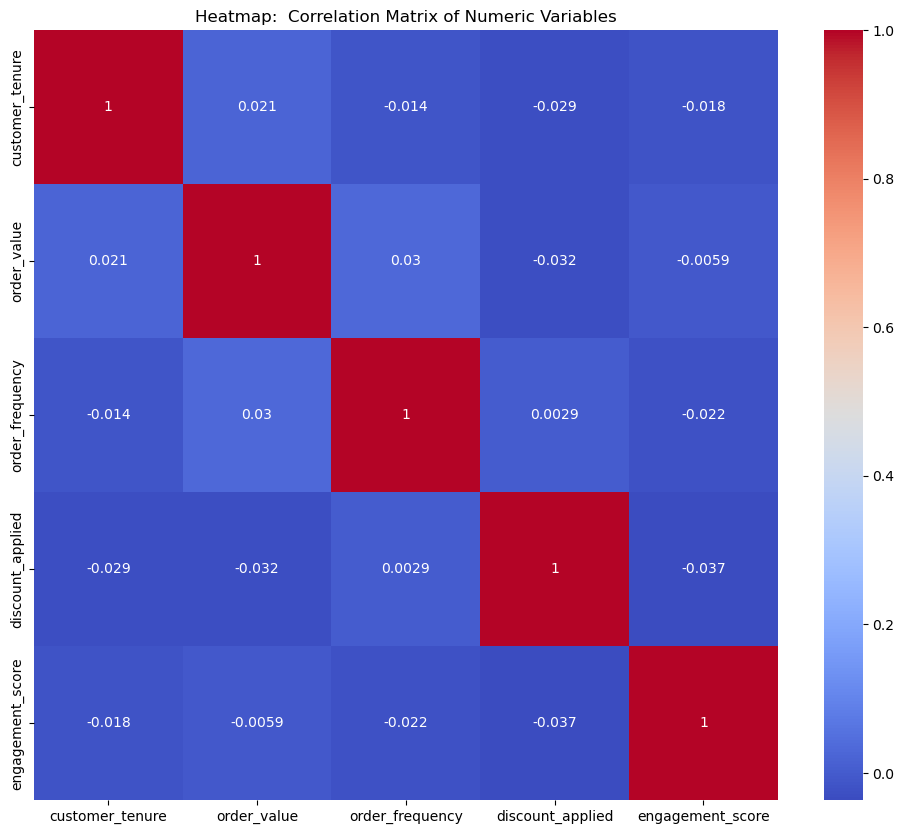

In [25]:
#heatmap (Correlation Matrix)
correlation_matrix=data[numeric_columns].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Heatmap:  Correlation Matrix of Numeric Variables')
plt.show()

# LabelEncoder 

In [26]:
le = LabelEncoder()
data['source'] = le.fit_transform(data['source'])

In [27]:
x=data[['source']]
y=data['engagement_score']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

# Model Training

Linear Regression

In [28]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#  Prediction

In [29]:
y_pred = model.predict(x_test)

# Evaluation

In [30]:
mse = mean_squared_error(y_test,y_pred)
print(f'MSE:{mse:.2f}')

MSE:779.10


Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [32]:
y_pred = model.predict(x_test)

In [33]:
mse = mean_squared_error(y_test,y_pred)
print(f'MSE:{mse:.2f}')

MSE:777.77


Random Forest Regressor

In [34]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [35]:
y_pred = model.predict(x_test)

In [36]:
mse=mean_squared_error(y_test,y_pred)
print(f'MSE:{mse:.2f}')

MSE:777.31


In [37]:
mae_lr = mean_absolute_error(y_test,LinearRegression().fit(x_train,y_train).predict(x_test))
mae_dt = mean_absolute_error(y_test,DecisionTreeRegressor(random_state=42).fit(x_train,y_train).predict(x_test))
mae_rf = mean_absolute_error(y_test,RandomForestRegressor(n_estimators=100, random_state=42).fit(x_train, y_train).predict(x_test))

print(f'MAE(Linear Regression):{mae_lr:.2f}')
print(f'MAE(Decision Tree Regressor):{mae_dt:.2f}')
print(f'MAE(Random Forest Regressor):{mae_rf:.2f}')

MAE(Linear Regression):23.90
MAE(Decision Tree Regressor):23.89
MAE(Random Forest Regressor):23.88


The MAE is a measure of the average difference between the predicted and actual values. A lower MAE indicates better model performance. In this case the MAE value for the three models are very close to each other.
1. Random Forest Regressor having the lowest MAE (23.88)
2. Decision Tree Regressor (23.89) and Linear Regression (23.90)